In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
type(lat_lngs)

zip

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Note this weird thing aboug this zip object, after you move it into a list or print it or into a dict, it becomes empty?

In [5]:
# Here this will not print anything, but if we move it to the step above, it will work but then the list in coordinates will be empty
for lat, lngs in lat_lngs:
    print(lat,lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [8]:
cities

['vangaindrano',
 'honningsvag',
 'anadyr',
 'bonavista',
 'nova olimpia',
 'uige',
 'katsuura',
 'jamestown',
 'klaksvik',
 'bani',
 'havre-saint-pierre',
 'mataura',
 'hamilton',
 'hermanus',
 'georgetown',
 'qaanaaq',
 'punta arenas',
 'victoria',
 'touros',
 'christchurch',
 'bambous virieux',
 'sao filipe',
 'arraial do cabo',
 'nazarovo',
 'khatanga',
 'chokurdakh',
 'attawapiskat',
 'mahibadhoo',
 'busselton',
 'kapaa',
 'terrace',
 'mityana',
 'mys shmidta',
 'ruidoso',
 'yellowknife',
 'murgab',
 'puerto ayora',
 'hvolsvollur',
 'kaeo',
 'timra',
 'ilulissat',
 'palabuhanratu',
 'grand gaube',
 'mahanje',
 'mount isa',
 'hilo',
 'poya',
 'palmdale',
 'sibolga',
 'thompson',
 'belushya guba',
 'vaini',
 'amderma',
 'zonguldak',
 'nabire',
 'port elizabeth',
 'pevek',
 'bengkulu',
 'port alfred',
 'ponta do sol',
 'abha',
 'huarmey',
 'qinhuangdao',
 'tuktoyaktuk',
 'taolanaro',
 'ushuaia',
 'richards bay',
 'haapu',
 'saint-philippe',
 'amahai',
 'tsihombe',
 'albany',
 'illoqq

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url) --> Don't print and submit to github, otherwise you expose your private key for this API

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [11]:
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
#     city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]} ")
    record_count += 1

Processing Record 1 of Set 1 | vangaindrano 
Processing Record 2 of Set 1 | honningsvag 
Processing Record 3 of Set 1 | anadyr 
Processing Record 4 of Set 1 | bonavista 
Processing Record 5 of Set 1 | nova olimpia 
Processing Record 6 of Set 1 | uige 
Processing Record 7 of Set 1 | katsuura 
Processing Record 8 of Set 1 | jamestown 
Processing Record 9 of Set 1 | klaksvik 
Processing Record 10 of Set 1 | bani 
Processing Record 11 of Set 1 | havre-saint-pierre 
Processing Record 12 of Set 1 | mataura 
Processing Record 13 of Set 1 | hamilton 
Processing Record 14 of Set 1 | hermanus 
Processing Record 15 of Set 1 | georgetown 
Processing Record 16 of Set 1 | qaanaaq 
Processing Record 17 of Set 1 | punta arenas 
Processing Record 18 of Set 1 | victoria 
Processing Record 19 of Set 1 | touros 
Processing Record 20 of Set 1 | christchurch 
Processing Record 21 of Set 1 | bambous virieux 
Processing Record 22 of Set 1 | sao filipe 
Processing Record 23 of Set 1 | arraial do cabo 
Processi

In [12]:
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
#     print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vangaindrano
Processing Record 2 of Set 1 | honningsvag
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | bonavista
Processing Record 5 of Set 1 | nova olimpia
Processing Record 6 of Set 1 | uige
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | bani
Processing Record 11 of Set 1 | havre-saint-pierre
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | christchurch
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | sao filipe
Processing Record 23 of Set 1 | arraial do cabo
Processing Record 24 of Set 1 |

Processing Record 39 of Set 4 | jacobina
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | xichang
Processing Record 42 of Set 4 | les cayes
Processing Record 43 of Set 4 | dorogino
Processing Record 44 of Set 4 | clearwater
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | osorno
Processing Record 47 of Set 4 | jiutai
Processing Record 48 of Set 4 | souillac
Processing Record 49 of Set 4 | zhigansk
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | nizhneudinsk
Processing Record 2 of Set 5 | jining
Processing Record 3 of Set 5 | kalakamati
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | divnomorskoye
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | manavalakurichi
Processing Record 8 of Set 5 | berdigestyakh
Processing Record 9 of Set 5 | turkistan
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | aquiraz
Processing Record 12 of Set 5 | pittsfield
Processing Rec

Processing Record 29 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 8 | jaumave
Processing Record 31 of Set 8 | ambanja
Processing Record 32 of Set 8 | grand baie
Processing Record 33 of Set 8 | gornopravdinsk
Processing Record 34 of Set 8 | muros
Processing Record 35 of Set 8 | chapleau
Processing Record 36 of Set 8 | abu samrah
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | thap than
Processing Record 39 of Set 8 | sioux lookout
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | kitgum
Processing Record 42 of Set 8 | russkaya polyana
Processing Record 43 of Set 8 | tsiroanomandidy
Processing Record 44 of Set 8 | rockport
Processing Record 45 of Set 8 | camana
Processing Record 46 of Set 8 | karaul
City not found. Skipping...
Processing Record 47 of Set 8 | boa viagem
Processing Record 48 of Set 8 | enkoping
Processing Record 49 of Set 8 | santa marta
Processing Record 50 of Set 8 | umzimvubu
City not found.

Processing Record 17 of Set 12 | tachov
Processing Record 18 of Set 12 | antofagasta
Processing Record 19 of Set 12 | kichera
Processing Record 20 of Set 12 | raudeberg
Processing Record 21 of Set 12 | mandera
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | cascais
Processing Record 24 of Set 12 | chimbarongo
Processing Record 25 of Set 12 | rapid valley
Processing Record 26 of Set 12 | mackay
Processing Record 27 of Set 12 | matamoros
Processing Record 28 of Set 12 | lagos
Processing Record 29 of Set 12 | dabakala
Processing Record 30 of Set 12 | viedma
Processing Record 31 of Set 12 | millinocket
Processing Record 32 of Set 12 | winburg
Processing Record 33 of Set 12 | dalvik
Processing Record 34 of Set 12 | si bun ruang
Processing Record 35 of Set 12 | majene
Processing Record 36 of Set 12 | thessalon
Processing Record 37 of Set 12 | pasni
Processing Record 38 of Set 12 | gazanjyk
Processing Record 39 of Set 12 | mangrol
Processing Record 40 of Set 12 | sam

In [13]:
len(city_data)

552

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vangaindrano,-23.3500,47.6000,64.33,82,84,8.25,MG,2021-06-07 03:49:38
1,Honningsvag,70.9821,25.9704,42.55,70,0,10.36,NO,2021-06-07 03:49:39
2,Anadyr,64.7500,177.4833,45.10,56,40,15.01,RU,2021-06-07 03:40:30
3,Bonavista,48.6499,-53.1147,35.60,81,94,4.07,CA,2021-06-07 03:46:23
4,Nova Olimpia,-14.7972,-57.2881,75.22,54,86,3.87,BR,2021-06-07 03:49:39
5,Uige,-7.6087,15.0613,62.60,56,31,3.18,AO,2021-06-07 03:40:32
6,Katsuura,35.1333,140.3000,75.31,82,98,4.52,JP,2021-06-07 03:45:16
7,Jamestown,42.0970,-79.2353,71.24,75,1,1.01,US,2021-06-07 03:44:34
8,Klaksvik,62.2266,-6.5890,49.12,92,100,4.41,FO,2021-06-07 03:49:40
9,Bani,18.2833,-70.3333,75.85,81,100,12.39,DO,2021-06-07 03:46:52


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vangaindrano,MG,2021-06-07 03:49:38,-23.3500,47.6000,47.6000,64.33,82,84,8.25
1,Honningsvag,NO,2021-06-07 03:49:39,70.9821,25.9704,25.9704,42.55,70,0,10.36
2,Anadyr,RU,2021-06-07 03:40:30,64.7500,177.4833,177.4833,45.10,56,40,15.01
3,Bonavista,CA,2021-06-07 03:46:23,48.6499,-53.1147,-53.1147,35.60,81,94,4.07
4,Nova Olimpia,BR,2021-06-07 03:49:39,-14.7972,-57.2881,-57.2881,75.22,54,86,3.87
5,Uige,AO,2021-06-07 03:40:32,-7.6087,15.0613,15.0613,62.60,56,31,3.18
6,Katsuura,JP,2021-06-07 03:45:16,35.1333,140.3000,140.3000,75.31,82,98,4.52
7,Jamestown,US,2021-06-07 03:44:34,42.0970,-79.2353,-79.2353,71.24,75,1,1.01
8,Klaksvik,FO,2021-06-07 03:49:40,62.2266,-6.5890,-6.5890,49.12,92,100,4.41
9,Bani,DO,2021-06-07 03:46:52,18.2833,-70.3333,-70.3333,75.85,81,100,12.39


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

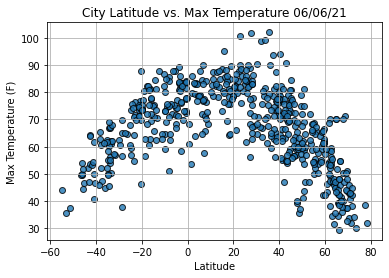

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

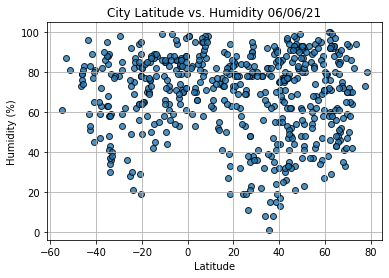

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

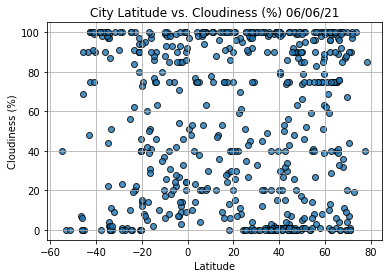

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

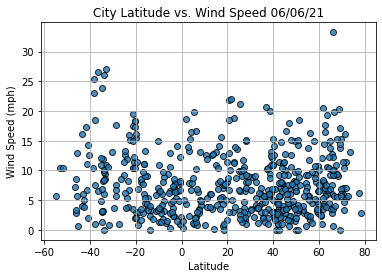

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, loc="center")
    plt.show()
    print(f" p-value: {round(p_value,2)}, r-value: {round(r_value,2)} & std_err: {round(std_err,2)}.")

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                     Hermanus
Country                        ZA
Date          2021-06-07 03:45:25
Lat                      -34.4187
Lng                       19.2345
Lng                       19.2345
Max Temp                     66.9
Humidity                       48
Cloudiness                      2
Wind Speed                  11.97
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
547    False
548     True
549     True
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Honningsvag,NO,2021-06-07 03:49:39,70.9821,25.9704,25.9704,42.55,70,0,10.36
2,Anadyr,RU,2021-06-07 03:40:30,64.7500,177.4833,177.4833,45.10,56,40,15.01
3,Bonavista,CA,2021-06-07 03:46:23,48.6499,-53.1147,-53.1147,35.60,81,94,4.07
6,Katsuura,JP,2021-06-07 03:45:16,35.1333,140.3000,140.3000,75.31,82,98,4.52
7,Jamestown,US,2021-06-07 03:44:34,42.0970,-79.2353,-79.2353,71.24,75,1,1.01


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

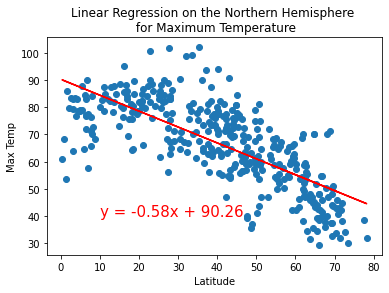

 p-value: 0.0, r-value: -0.73 & std_err: 0.03.


In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

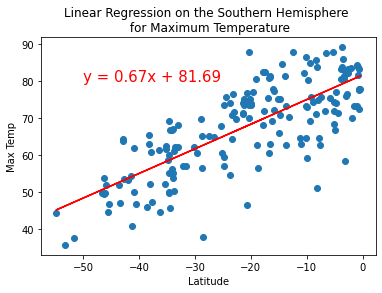

 p-value: 0.0, r-value: 0.76 & std_err: 0.04.


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))

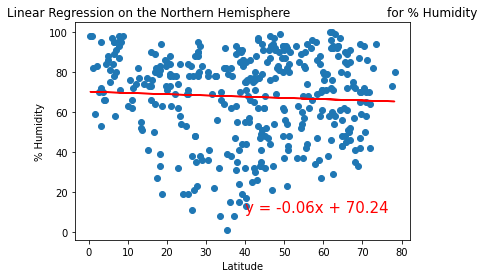

 p-value: 0.28, r-value: -0.06 & std_err: 0.06.


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

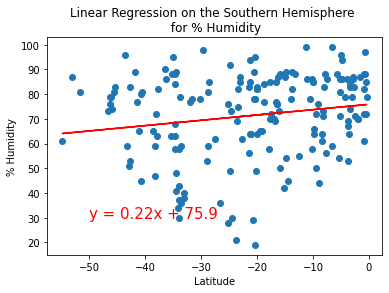

 p-value: 0.02, r-value: 0.18 & std_err: 0.09.


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

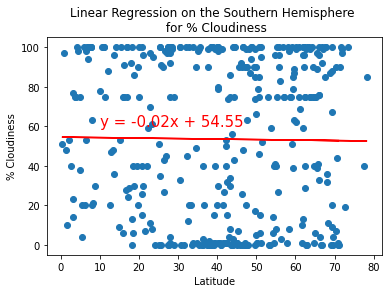

 p-value: 0.81, r-value: -0.01 & std_err: 0.11.


In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

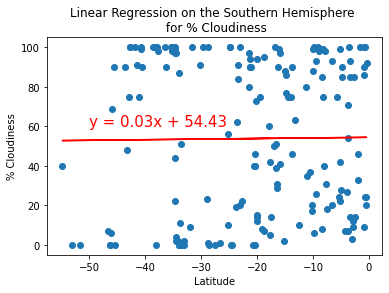

 p-value: 0.89, r-value: 0.01 & std_err: 0.21.


In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

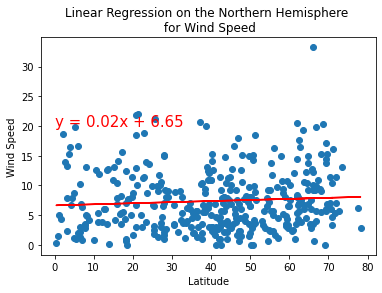

 p-value: 0.17, r-value: 0.07 & std_err: 0.01.


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,20))

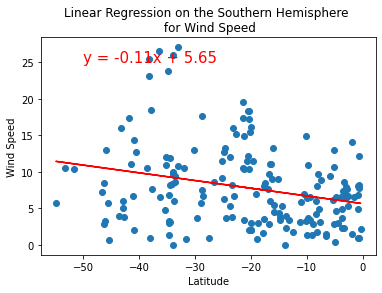

 p-value: 0.0, r-value: -0.26 & std_err: 0.03.


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))